In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [3]:
import numpy as np

In [4]:
import lal
import lalsimulation as lalsim

In [5]:
from scrinet.interfaces import lalutils, rotations

In [6]:
from scrinet.workflow import generators

In [7]:
import phenom

In [8]:
def plot_modes(wr):
    plt.figure()
    plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,0)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-2)]))
    plt.title(wr.frame)
    plt.show()
    plt.close()

In [9]:
def gen_wf(q, chi1x, chi1z):

    m1, m2 = phenom.m1_m2_M_q(60, q)

    params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)
    times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])
    
    thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
        mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
        spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
        spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
    print(thetaJN, alpha0, phi_aligned)
    
    wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)
    plot_modes(wr)    
    
    wr.from_inertial_frame_to_coprecessing_frame()
    plot_modes(wr)   
    

    
    plt.figure()
    plt.plot(wr.times, wr.alpha, label='alpha')
    plt.plot(wr.times, wr.beta, label='beta')
    plt.plot(wr.times, wr.gamma, label='gamma')
    plt.legend()
    
    wr.times_m = phenom.StoM(wr.times, 60)
    
    return wr

In [51]:
p1 = [ 3.99354272,  0.14069364, -0.97585694]
p2 = [3.66626972, 0.35451116, 0.87098307]

0.43489734621325493 1.2246467991473532e-16 -0.0


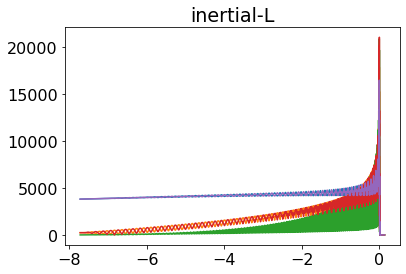

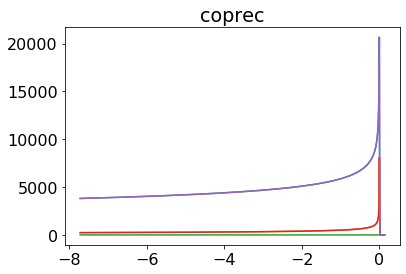

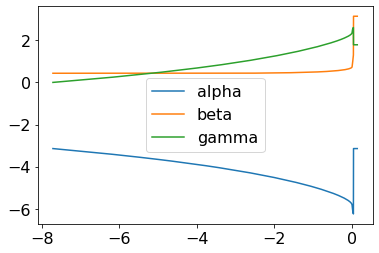

In [52]:
wr1 = gen_wf(*p1)

0.1553339365066987 1.2246467991473532e-16 -0.0


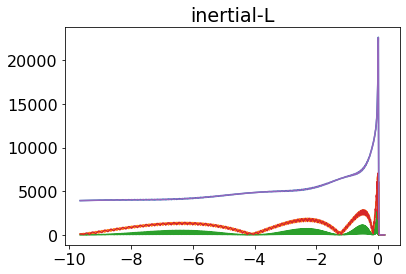

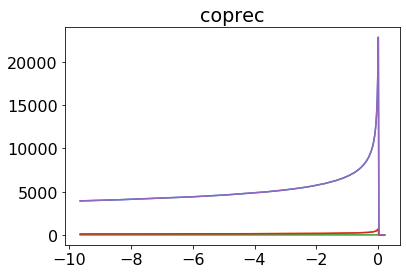

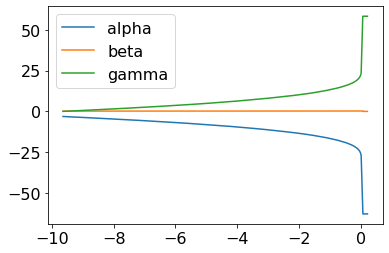

In [53]:
wr2 = gen_wf(*p2)

In [54]:
wr2.beta

array([0.15533394, 0.15533395, 0.155334  , ..., 0.        , 0.        ,
       0.        ])

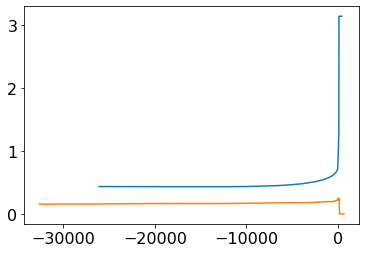

In [55]:
plt.figure()
plt.plot(wr1.times_m, wr1.beta)
plt.plot(wr2.times_m, wr2.beta)
# plt.axhline(wr1.thetaJN, ls='--', c='C0')
# plt.axhline(wr2.thetaJN, ls='--', c='C1')
# plt.xlim(-100,200)

(-1000, 200)

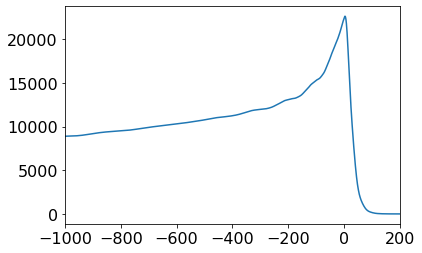

In [56]:
plt.figure()
plt.plot(wr2.times_m, np.abs(wr2.hlms_original[(2,2)]))
plt.xlim(-1000, 200)

(-1000, 200)

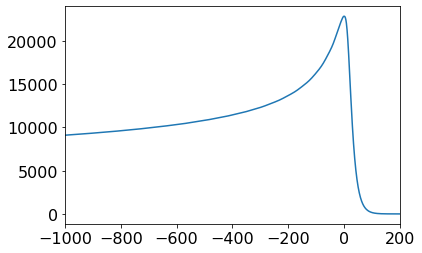

In [57]:
plt.figure()
plt.plot(wr2.times_m, np.abs(wr2.hlms[(2,2)]))
plt.xlim(-1000, 200)

In [58]:
plt.figure()
plt.plot(wr1.times_m, wr1.beta)
# plt.axhline(wr1.thetaJN, c='k', ls='--')
plt.xlim(-100, 200)
plt.ylim(0.14,)

(0.14, 3.2770866252330078)

In [59]:
plt.figure()
plt.plot(wr2.times_m, wr2.beta)
plt.axhline(wr2.thetaJN, c='k', ls='--')
# plt.xlim(-1000, 200)
plt.ylim(0.14,)

(0.14, 0.2571707654473682)